In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.__version__

'2.3.1'

In [4]:
np.random.seed(10)
tf.compat.v1.set_random_seed(10)

In [5]:
# Cargo los csv
df_local = pd.read_csv("./unified-lightcurves-local.csv").iloc[:, 1:]

display(df_local)

,kepid,kepler_name,kepoi_name,koi_disposition,light_flux_0001,light_flux_0002,light_flux_0003,light_flux_0004,light_flux_0005,light_flux_0006,...,light_flux_0092,light_flux_0093,light_flux_0094,light_flux_0095,light_flux_0096,light_flux_0097,light_flux_0098,light_flux_0099,light_flux_0100,light_flux_0101
0,10797460.0,Kepler-227 b,K00752.01,1,1.727321,0.728728,1.125654,1.229677,1.327881,1.390140,...,1.318587,1.390135,0.968716,1.285568,1.216662,0.874477,1.627442,0.960296,0.998560,1.489279
1,10811496.0,NaN,K00753.01,0,1.044298,0.961948,1.000986,0.983043,0.983156,1.037890,...,1.023945,0.999707,0.986407,0.980490,1.018677,0.976698,0.933617,1.067080,1.002989,1.012337
2,10848459.0,NaN,K00754.01,0,-0.289601,-0.370998,-0.441931,-0.410758,-0.379353,-0.507287,...,-0.445697,-0.442599,-0.365730,-0.381951,-0.287742,-0.285504,-0.269432,-0.261419,-0.224786,-0.308863
3,10854555.0,Kepler-664 b,K00755.01,1,-0.066347,-0.019535,0.481834,-0.052898,-0.000501,0.402655,...,-0.620233,-0.403630,-0.347501,-0.388085,-0.302855,-0.130258,-0.042718,0.674248,-0.583962,0.165856
4,10872983.0,Kepler-228 d,K00756.01,1,0.910853,0.953313,1.121489,0.641881,1.222616,0.878186,...,1.040783,0.863073,1.246061,0.969055,1.318099,1.276269,1.092889,0.842558,1.081244,0.972349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,10031643.0,NaN,K07984.01,0,1.326015,-0.237976,1.031217,1.533878,0.628377,1.317783,...,0.231072,0.877314,1.741571,1.331278,1.134218,1.485683,0.323981,-0.605954,0.691033,1.012538
6091,10090151.0,NaN,K07985.01,0,-0.818461,-0.582961,-0.804967,-0.881438,-0.608308,-0.630170,...,-0.821112,-0.787683,-0.549940,-0.806678,-0.688768,-0.796852,-0.617750,-0.695399,-0.710079,-0.551582
6092,10128825.0,NaN,K07986.01,0,-0.202417,-0.490636,0.925138,0.894101,1.454064,-0.070774,...,1.194394,-0.265945,-0.643078,0.907540,1.074063,1.982618,0.704504,1.937049,0.038070,1.604524
6093,10147276.0,NaN,K07987.01,0,0.650887,0.889116,0.758458,0.425697,0.726841,1.090262,...,0.987756,0.594261,0.684510,1.125490,0.726558,0.479359,-0.267394,0.273248,1.216787,0.561130


In [6]:
local_fluxes = df_local.iloc[:,4:]
local_labels = df_local.iloc[:,3]

## Particionado de datos

In [7]:
xl_train, xl_test, yl_train, yl_test = train_test_split(
    local_fluxes, local_labels, test_size=0.3, random_state=11)

In [8]:
print(xl_train.shape, xl_test.shape, yl_train.shape, yl_test.shape)

(4266, 101) (1829, 101) (4266,) (1829,)


In [9]:
#Definimos las dimensiones
n_outputs = 1
nL_timesteps, nL_features  = xl_train.shape[0], xl_train.shape[1]

In [10]:
print(nL_timesteps, nL_features)

4266 101


In [11]:
#Expandimos las dimensiones de train 
xle_train = np.expand_dims(xl_train,axis=-1) 
yle_train = np.array(yl_train)

In [12]:
print(xl_train.shape, yl_train.shape)
print(xle_train.shape, yle_train.shape)

(4266, 101) (4266,)
(4266, 101, 1) (4266,)


In [13]:
#Expandimos las dimensiones de test
xle_test = np.expand_dims(xl_test,axis=-1)
yle_test = np.array(yl_test)

In [14]:
print(xl_test.shape, yl_test.shape)
print(xle_test.shape, yle_test.shape)

(1829, 101) (1829,)
(1829, 101, 1) (1829,)


## Construcción Red Neuronal

### Red para vistas locales

In [15]:
# first input model
inputLocalView = tf.keras.layers.Input(shape=(nL_features, 1))
inputLocalView.set_shape([nL_timesteps, nL_features, 1]) # 4266 x 101

CL1 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(inputLocalView)
CL2 = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu')(CL1)

ML1 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL2)

CL3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(ML1)
CL4 = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(CL3)

ML2 = tf.keras.layers.MaxPooling1D(pool_size=7, strides=2)(CL4)
flat1 = tf.keras.layers.Flatten()(ML2)

In [16]:
# interpretation model
hidden1 = tf.keras.layers.Dense(256, activation='relu')(flat1)
hidden2 = tf.keras.layers.Dense(256, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(256, activation='relu')(hidden2)
hidden4 = tf.keras.layers.Dense(256, activation='relu')(hidden3)

output = tf.keras.layers.Dense(n_outputs, activation='tanh')(hidden4)

model = tf.keras.Model(inputs=inputLocalView, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(4266, 101, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (4266, 97, 16)            96        
_________________________________________________________________
conv1d_1 (Conv1D)            (4266, 93, 16)            1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (4266, 44, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (4266, 40, 32)            2592      
_________________________________________________________________
conv1d_3 (Conv1D)            (4266, 36, 32)            5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (4266, 15, 32)           

In [18]:
# divisores 4266: 1, 2, 3, 6, 9, 18, 27, 54, 79, 158, 237, 474, 711, 1422, 2133, 4266
bs = 237
Ajuste = model.fit([xle_train], yle_train, epochs=50, batch_size=bs)

Epoch 1/50
18/18 [==============================] - 1s 38ms/step - loss: 0.7312 - accuracy: 0.7508
Epoch 2/50
18/18 [==============================] - 1s 38ms/step - loss: 0.4765 - accuracy: 0.7792
Epoch 3/50
18/18 [==============================] - 1s 41ms/step - loss: 0.4480 - accuracy: 0.7984
Epoch 4/50
18/18 [==============================] - 1s 39ms/step - loss: 0.4825 - accuracy: 0.7773
Epoch 5/50
18/18 [==============================] - 1s 41ms/step - loss: 0.4833 - accuracy: 0.7909
Epoch 6/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4460 - accuracy: 0.8073
Epoch 7/50
18/18 [==============================] - 1s 37ms/step - loss: 0.4293 - accuracy: 0.8160
Epoch 8/50
18/18 [==============================] - 1s 54ms/step - loss: 0.4132 - accuracy: 0.8214
Epoch 9/50
18/18 [==============================] - 1s 36ms/step - loss: 0.4424 - accuracy: 0.8101
Epoch 10/50
18/18 [==============================] - 1s 41ms/step - loss: 0.4819 - accuracy: 0.7839
Epoch 11/

In [19]:
y_pred_keras = model.predict([xle_test]).ravel() # Return a contiguous flattened array
display(y_pred_keras)

array([0.21443212, 0.1572915 , 0.10388456, ..., 0.07361746, 0.10415855,
       0.03367056], dtype=float32)

In [20]:
# Defino las métricas
# false positive rates / true positive rates / Decreasing thresholds on the decision function
fpr_keras, tpr_keras, thresholds_keras = sklearn.metrics.roc_curve(yle_test, y_pred_keras)
auc_keras = sklearn.metrics.auc(fpr_keras, tpr_keras) # Area Under the Curve
gmeans = np.sqrt(tpr_keras * (1-fpr_keras))

# localiza el índice del mayor g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_keras[ix], gmeans[ix]))


Best Threshold=0.124934, G-Mean=0.752


In [21]:
#Umbral estándar
labels_Standart = (y_pred_keras >= 0.5).astype(np.int)
PhiM_Standart = sklearn.metrics.matthews_corrcoef(yle_test, labels_Standart)
Matrix_Standart = sklearn.metrics.confusion_matrix(yle_test, labels_Standart)

#Imprimo por pantalla las métricas
auc_keras, PhiM_Standart, print(Matrix_Standart)


[[1320   40]
 [ 290  179]]


(0.8353756427944312, 0.47377653157015137, None)

In [22]:
#Umbral OPT
labels_OPT =(y_pred_keras >= thresholds_keras[ix]).astype(np.int)
PhiCoeff_OPT = sklearn.metrics.matthews_corrcoef(yle_test, labels_OPT)
Matrix_OPT = sklearn.metrics.confusion_matrix(yle_test, labels_OPT)
F_Measure_OPT = sklearn.metrics.f1_score(yle_test, labels_OPT, average='binary')
Accuracy_OPT= sklearn.metrics.accuracy_score(yle_test, labels_OPT, normalize=True)
Recall_OPT= sklearn.metrics.recall_score(yle_test, labels_OPT, average=None)
Average_precision_OPT= sklearn.metrics.average_precision_score(yle_test, labels_OPT)


#Imprimo por pantalla las métricas
print("AUC:", auc_keras)
print("F_Measure:", F_Measure_OPT)
print("PhiCoeff:", PhiCoeff_OPT)
print("Average_precision:", Average_precision_OPT)
print("Accuracy:", Accuracy_OPT)
print("Recall:", Recall_OPT)
print("Matriz de confusión:")
print( Matrix_OPT)


AUC: 0.8353756427944312
F_Measure: 0.6065711878685762
PhiCoeff: 0.45099656464812715
Average_precision: 0.44445978420841253
Accuracy: 0.7446692181519956
Recall: [0.73676471 0.76759062]
Matriz de confusión:
[[1002  358]
 [ 109  360]]


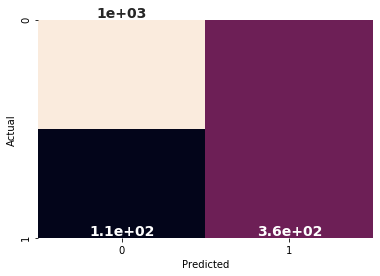

In [23]:
#Ploteo la matrix de confusión
import seaborn as sn
df_cm = pd.DataFrame(Matrix_OPT, index = [i for i in "01"],
                  columns = [i for i in "01"])

plt.figure(0.5)
heat_map = sn.heatmap(df_cm, xticklabels=True, yticklabels=True, annot=True, annot_kws = {"ha": 'center',"va": 'bottom'},cbar=False)
#heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')

for text in heat_map.texts:
    text.set_size(14)
    text.set_weight('bold')
    if text.get_text() == '5':
        text.set_color('black')


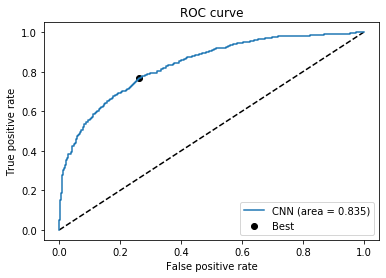

In [24]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.3f})'.format(auc_keras))
plt.scatter(fpr_keras[ix], tpr_keras[ix], marker='o', color='black', label='Best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
